In [84]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sklearn.mixture import GaussianMixture
from graph_lassov5 import GraphLassoMix
from tools.gm_tools_old import gaussian_mixture_sample, gm_params_generator, best_cont_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
def center_gen(dim, k):
    centers = []
    for i in range(k):
        center_id = [int(x) for x in bin(i).split("b")[1]]
        complement = [0 for _ in range(dim-len(center_id))]
        centers.append(complement+center_id)
    return np.array(centers)

In [86]:
d = 50
N = 5000
k = 50

In [87]:
#_, centers, cov = gm_params_generator(d, k)
centers = center_gen(d,k)
weights = 1./k*np.ones(k)
cov = 1e-2*np.array([np.diag(np.ones(d)) for _ in range(k)])
X, Y = gaussian_mixture_sample(weights, centers, cov, N)


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

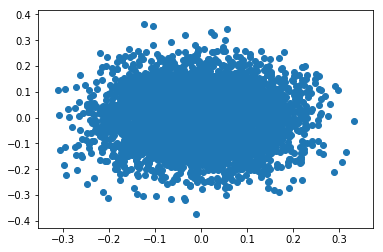

In [89]:
plt.scatter(X[:,2], X[:,1])

In [90]:

def algo_score(Y, y_estim, t=0):
    mat, permut, diag_sum = best_cont_matrix(Y, y_estim)
    return permut

In [ ]:
lasso = GraphLassoMix(n_components=k, n_iter=20)
lasso.fit(X)
y_lasso = lasso.clusters_assigned

gmm = GaussianMixture(n_components=k, covariance_type="full")
gmm.fit(X)
y_em = gmm.predict(X)

# print "===Glasso result==="
#permut_lasso = algo_score(Y, y_lasso)

# print "\n===EM result==="
#permut_gmm = algo_score(Y, y_em)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10


In [75]:
#permut_lasso

In [65]:
#permut_gmm

In [82]:
l = []
for idx, val in enumerate(permut_lasso):
    l.append(1. / (cov[0].shape[0] ** 2) * np.linalg.norm(np.linalg.inv(cov[0]) - lasso.omegas[val]))
    #
l2 = []
for idx, val in enumerate(permut_gmm):
    l2.append(1. / (cov[0].shape[0] ** 2) * np.linalg.norm(np.linalg.inv(cov[0]) - np.linalg.inv(gmm.covariances_[val])))

print max(l), max(l2)

0.0513921108631 0.87644464225


In [55]:
lasso.pi

array([ 0.099,  0.114,  0.106,  0.09 ,  0.11 ,  0.087,  0.096,  0.102,
        0.092,  0.104])

In [214]:
gmm.covariances_

array([[[  8.80011235e-03,  -2.14148520e-04,  -5.25321894e-04],
        [ -2.14148520e-04,   8.54414294e-03,  -1.15077310e-03],
        [ -5.25321894e-04,  -1.15077310e-03,   1.00768630e-02]],

       [[  1.11150140e-02,  -1.03777471e-04,   1.06937855e-03],
        [ -1.03777471e-04,   9.44338252e-03,  -4.19325373e-04],
        [  1.06937855e-03,  -4.19325373e-04,   1.02681367e-02]],

       [[  1.01890554e-02,  -1.14293746e-03,   7.03881339e-05],
        [ -1.14293746e-03,   9.39423272e-03,   7.24729768e-04],
        [  7.03881339e-05,   7.24729768e-04,   1.08102296e-02]],

       [[  1.00416382e-02,   8.38060987e-04,  -6.08434253e-04],
        [  8.38060987e-04,   9.58035576e-03,  -6.52337368e-04],
        [ -6.08434253e-04,  -6.52337368e-04,   1.13569739e-02]],

       [[  8.37649167e-03,   3.45546472e-04,  -1.54526963e-03],
        [  3.45546472e-04,   9.99191712e-03,   8.02589877e-04],
        [ -1.54526963e-03,   8.02589877e-04,   9.86831004e-03]]])

In [446]:
from os import listdir
from os.path import isfile, join
import pickle
import pandas as pd
import seaborn as sns
#matplotlib.rc('font', family='serif', serif='cm10')
#matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

simu_folder = "dg_2017-09-26_12.29.30/"
folder = "./"+simu_folder+"/"
onlyfiles = [f for f in listdir(folder) if (isfile(join(folder, f)) and f.startswith("res_"))]
res = []
for f in onlyfiles:
    res.append(pickle.load(open(folder+f)))

In [447]:
df = pd.DataFrame(res)

In [484]:

params = {'legend.fontsize': '16',
         'axes.labelsize': '6'}
plt.rcParams.update(params)
def gen_graph_dict_gen_loss(df, p):
    df_temp = df[(df.p==p)]
    df_temp2 = df_temp.drop(['p', 'X', 'time_lasso', 'time_em'], axis=1)
    df2 = pd.melt(df_temp2, id_vars=["N","K"], var_name="Type", value_name="loss")
    df2.loss = df2.loss.apply(max)
    df2['Type']=df2['Type'].map({"error_em":"EM", "error_lasso":"Glasso GMM"})
    print df2.head()
    #return df2
    ##set(df2["Type"])
    ##df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
    #df3 = pd.concat([df2, df2.apply(extract_type, axis =1)], axis=1)
    ##df5 = df4.apply(remove_method_comp, axis=1)
    #df4 = df3.replace([np.inf, -np.inf], np.nan).dropna(subset=["loss"], how="all")
    plt.figure(figsize=(10,5))
    boxplot = sns.boxplot(x="Type", y="loss", data=df2[df2.K==4], hue="N",
                         palette=["#ff6666", "#ffd966", "#b3ff66"])
    for patch in boxplot.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    boxplot.set_yscale("log")
    #if metric == 'L2':
    boxplot.set_ylabel(r'$\max_k||\hat\Omega_k-\Omega_k^*||_F$',fontsize=16)
    #else:
    #    boxplot.set_ylabel(metric+'-Loss')
    boxplot.set_xlabel(r'\textbf{Number of clusters}', fontsize=16)
#
    sns_plot = boxplot.get_figure()

     N   K Type          loss
0  100  10   EM  56512.258350
1  100  10   EM  69212.757413
2  100  10   EM   4011.330465
3  100  10   EM   1952.389973
4  100  10   EM  79920.005610


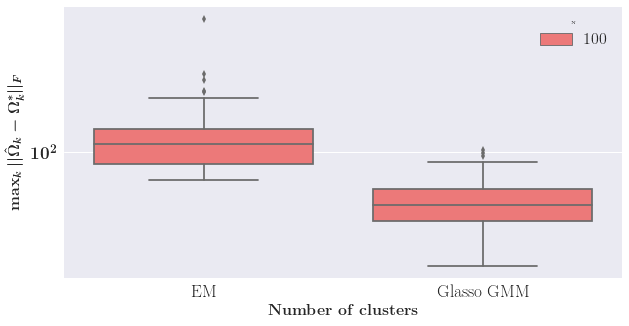

In [485]:
gen_graph_dict_gen_loss(df, 5)

In [456]:
df3.loss = df3.loss.apply(max)

NameError: name 'df3' is not defined

In [483]:
set(df.K)

{2, 4, 10}

In [103]:
a = np.zeros([2,10,2])

In [147]:
a[0].shape

(10, 2)